<a href="https://colab.research.google.com/github/PhamAnhKiet20146220/AI-T7-tiet_1234/blob/main/FuzzyLogic_TransplantPatients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=72810708dc286ae166014efee0de7e9a4e3ec0c7d3c8ca7416ff13dd77a675c1
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


90.42187499999999
80.0


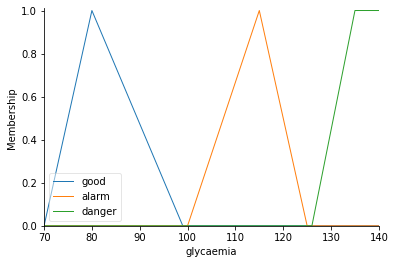

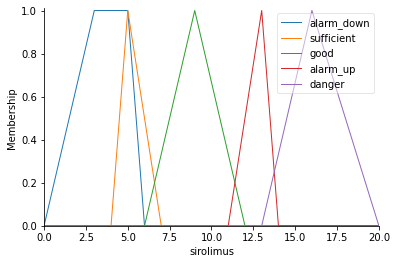

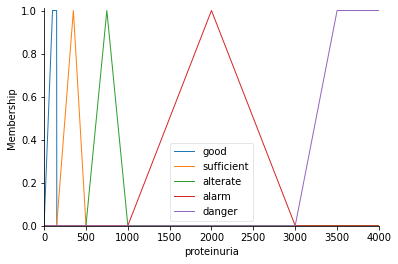

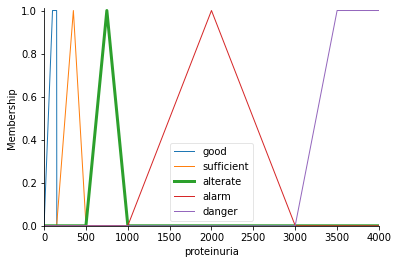

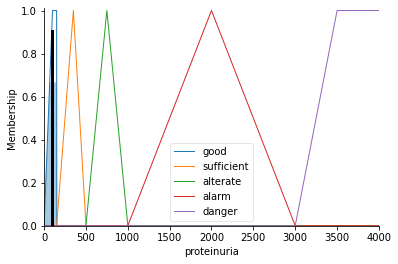

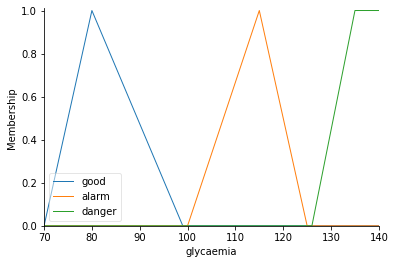

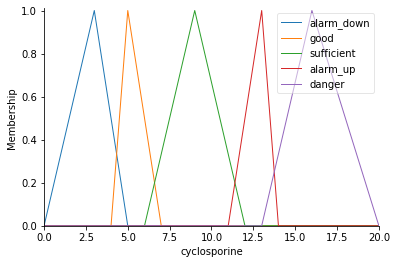

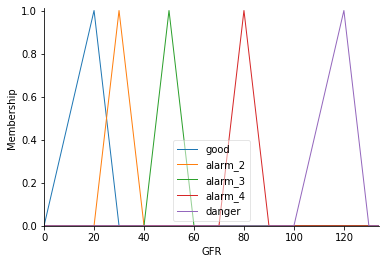

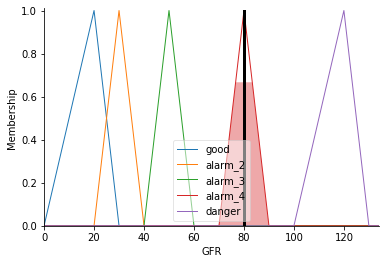

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

glycaemia = ctrl.Antecedent(np.arange(70,141,1),'glycaemia')
sirolimus = ctrl.Antecedent(np.arange(0,21,1),'sirolimus')
proteinuria = ctrl.Consequent(np.arange(0,4001,1),'proteinuria')

glycaemia['good'] = fuzz.trimf(glycaemia.universe,[70,80,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[100,115,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[126,135,140,140])

sirolimus['alarm_down'] = fuzz.trapmf(sirolimus.universe,[0,3,5,5])
sirolimus['sufficient'] = fuzz.trimf(sirolimus.universe,[4,5,7])
sirolimus['good'] = fuzz.trimf(sirolimus.universe,[6,9,12])
sirolimus['alarm_up'] = fuzz.trimf(sirolimus.universe,[11,13,14])
sirolimus['danger'] = fuzz.trimf(sirolimus.universe,[13,16,20])

proteinuria['good'] = fuzz.trapmf(proteinuria.universe,[0,100,150,150])
proteinuria['sufficient'] = fuzz.trimf(proteinuria.universe,[150,350,500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe,[500,750,1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe,[1000,2000,3000])
proteinuria['danger'] = fuzz.trapmf(proteinuria.universe,[3000,3500,4000,4000])

glycaemia.view()
sirolimus.view()
proteinuria.view()
proteinuria['alterate'].view()

rule1 = ctrl.Rule(glycaemia['good']&sirolimus['alarm_down'],proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['good']&sirolimus['sufficient'],proteinuria['sufficient'])
rule3 = ctrl.Rule(glycaemia['good']&sirolimus['good'],proteinuria['good'])
rule4 = ctrl.Rule(glycaemia['good']&sirolimus['alarm_up'],proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['good']&sirolimus['danger'],proteinuria['alarm'])

rule6 = ctrl.Rule(glycaemia['alarm']&sirolimus['alarm_down'],proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm']&sirolimus['sufficient'],proteinuria['alarm'])
rule8 = ctrl.Rule(glycaemia['alarm']&sirolimus['good'],proteinuria['sufficient'])
rule9 = ctrl.Rule(glycaemia['alarm']&sirolimus['alarm_up'],proteinuria['alarm'])
rule10 = ctrl.Rule(glycaemia['alarm']&sirolimus['danger'],proteinuria['danger'])

rule11 = ctrl.Rule(glycaemia['danger']&sirolimus['alarm_down'],proteinuria['danger'])
rule12 = ctrl.Rule(glycaemia['danger']&sirolimus['sufficient'],proteinuria['alarm'])
rule13 = ctrl.Rule(glycaemia['danger']&sirolimus['good'],proteinuria['alterate'])
rule14 = ctrl.Rule(glycaemia['danger']&sirolimus['alarm_up'],proteinuria['danger'])
rule15 = ctrl.Rule(glycaemia['danger']&sirolimus['danger'],proteinuria['danger'])
                  
proteinuriaring_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
proteinuriaring = ctrl.ControlSystemSimulation(proteinuriaring_ctrl)
proteinuriaring.input['glycaemia'] = 80
proteinuriaring.input['sirolimus'] = 10
proteinuriaring.compute()
print(proteinuriaring.output['proteinuria'])
proteinuria.view(sim = proteinuriaring)

 #CASE 2

glycaemia = ctrl.Antecedent(np.arange(70,141,1),'glycaemia')
cyclosporine = ctrl.Antecedent(np.arange(0,21,1),'cyclosporine')
GFR = ctrl.Consequent(np.arange(0,135,1),'GFR')

glycaemia['good'] = fuzz.trimf(glycaemia.universe,[70,80,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[100,115,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[126,135,140,140])

cyclosporine['alarm_down'] = fuzz.trimf(cyclosporine.universe,[0,3,5])
cyclosporine['good'] = fuzz.trimf(cyclosporine.universe,[4,5,7])
cyclosporine['sufficient'] = fuzz.trimf(cyclosporine.universe,[6,9,12])
cyclosporine['alarm_up'] = fuzz.trimf(cyclosporine.universe,[11,13,14])
cyclosporine['danger'] = fuzz.trimf(cyclosporine.universe,[13,16,20])

GFR['good'] = fuzz.trimf(GFR.universe,[0,20,30])
GFR['alarm_2'] = fuzz.trimf(GFR.universe,[20,30,40])
GFR['alarm_3'] = fuzz.trimf(GFR.universe,[40,50,60])
GFR['alarm_4'] = fuzz.trimf(GFR.universe,[70,80,90])
GFR['danger'] = fuzz.trimf(GFR.universe,[100,120,130])

glycaemia.view()
cyclosporine.view()
GFR.view()

rule1 = ctrl.Rule(glycaemia['good']&cyclosporine['alarm_down'],GFR['alarm_2'])
rule2 = ctrl.Rule(glycaemia['good']&cyclosporine['good'],GFR['good'])
rule3 = ctrl.Rule(glycaemia['good']&cyclosporine['sufficient'],GFR['good'])
rule4 = ctrl.Rule(glycaemia['good']&cyclosporine['alarm_up'],GFR['alarm_3'])
rule5 = ctrl.Rule(glycaemia['good']&cyclosporine['danger'],GFR['alarm_4'])

rule6 = ctrl.Rule(glycaemia['alarm']&cyclosporine['alarm_down'],GFR['alarm_3'])
rule7 = ctrl.Rule(glycaemia['alarm']&cyclosporine['good'],GFR['alarm_2'])
rule8 = ctrl.Rule(glycaemia['alarm']&cyclosporine['sufficient'],GFR['alarm_2'])
rule9 = ctrl.Rule(glycaemia['alarm']&cyclosporine['alarm_up'],GFR['alarm_3'])
rule10 = ctrl.Rule(glycaemia['alarm']&cyclosporine['danger'],GFR['danger'])

rule11 = ctrl.Rule(glycaemia['danger']&cyclosporine['alarm_down'],GFR['alarm_4'])
rule12 = ctrl.Rule(glycaemia['danger']&cyclosporine['good'],GFR['alarm_2'])
rule13 = ctrl.Rule(glycaemia['danger']&cyclosporine['sufficient'],GFR['alarm_3'])
rule14 = ctrl.Rule(glycaemia['danger']&cyclosporine['alarm_up'],GFR['alarm_4'])
rule15 = ctrl.Rule(glycaemia['danger']&cyclosporine['danger'],GFR['danger'])
                  
GFRing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
GFRing = ctrl.ControlSystemSimulation(GFRing_ctrl)
GFRing.input['glycaemia'] = 80
GFRing.input['cyclosporine'] = 15
GFRing.compute()
print(GFRing.output['GFR'])
GFR.view(sim = GFRing)